In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [9]:
# Load the stock price data from a CSV file
df = pd.read_csv('MSFT.csv')

In [10]:
data = df.filter(['Close']).values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]


In [11]:
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 60

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [12]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
model.fit(X_train, y_train, epochs=40, batch_size=32)

Epoch 1/40
234/234 [==============================] - 5s 20ms/step - loss: 2.4966e-06
Epoch 2/40
234/234 [==============================] - 5s 23ms/step - loss: 2.5559e-06
Epoch 3/40
234/234 [==============================] - 5s 20ms/step - loss: 2.5709e-06
Epoch 4/40
234/234 [==============================] - 5s 21ms/step - loss: 2.5067e-06
Epoch 5/40
234/234 [==============================] - 5s 20ms/step - loss: 2.4722e-06
Epoch 6/40
234/234 [==============================] - 5s 20ms/step - loss: 2.7188e-06
Epoch 7/40
234/234 [==============================] - 5s 20ms/step - loss: 2.4399e-06
Epoch 8/40
234/234 [==============================] - 5s 21ms/step - loss: 2.5407e-06
Epoch 9/40
234/234 [==============================] - 5s 23ms/step - loss: 2.5319e-06
Epoch 10/40
234/234 [==============================] - 5s 21ms/step - loss: 2.5304e-06
Epoch 11/40
234/234 [==============================] - 5s 22ms/step - loss: 2.5008e-06
Epoch 12/40
234/234 [==============================]

57/57 [==============================] - 0s 8ms/step


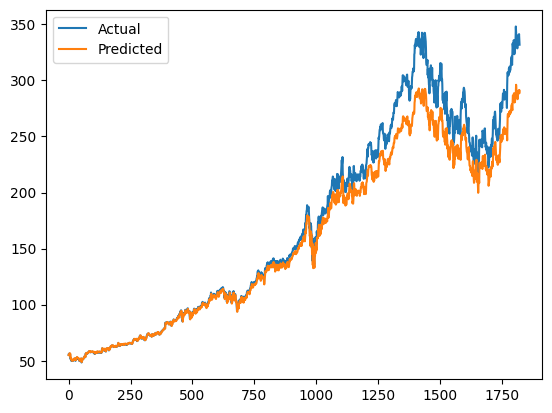

In [20]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.plot(actual_prices, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()
